# Using Keras library to train images from MNIST dataset


##### Based on http://euler.stat.yale.edu/~tba3/stat665/lectures/lec17/notebook17.html

https://emiliendupont.github.io/2018/03/14/mnist-chicken/



In [1]:
# for displaying several outputs from one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
### Checking installed packages
import subprocess
import sys
reqs = subprocess.check_output([sys.executable, '-m', 'pip', 'freeze'])
installed_packages = [r.decode().split('==')[0] for r in reqs.split()]

In [3]:
import sys

# Keras
if  not 'keras' in installed_packages:
  !pip install keras --quiet
  !pip install keras-tqdm --quiet

# Matplotlib
if  not 'matplotlib' in installed_packages:
  !pip install matplotlib --quiet

# Matplotlib
if  not 'seaborn' in installed_packages:
  !pip install seaborn --quiet

import matplotlib
# sprawdzamy jego wersje 
print ('Matplotlib version :',matplotlib.__version__)
import tensorflow as tf 
print("Tensorflow version :",tf.__version__)

import keras
print("Keras version: ",keras.__version__)
import seaborn as sn
print("Seaborn version: ",sn.__version__)

Matplotlib version : 3.1.1


/home/djkormo/.virtualenvs/keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/djkormo/.virtualenvs/keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/djkormo/.virtualenvs/keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/djkormo/.virtualenvs/keras/lib/python3.6/site-

Tensorflow version : 1.13.1
Keras version:  2.2.5


Using TensorFlow backend.


Seaborn version:  0.9.0


In [4]:
#!pip install keras-tqdm

In [5]:
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.datasets import mnist, cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,BatchNormalization
from keras.optimizers import SGD, RMSprop
from keras.utils import np_utils
from keras.regularizers import l2
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping ,ReduceLROnPlateau,ModelCheckpoint
from keras_tqdm import TQDMNotebookCallback
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from IPython.display import Image
#from sklearn.model_selection import train_test_split
import pydot
import graphviz

In [6]:
import keras
print("Keras backend: ",keras.backend.backend())
# set where is channel in our data
keras.backend.set_image_data_format('channels_last')

Keras backend:  tensorflow


Load the MNIST dataset, flatten the images, convert the class labels, and scale the data.

In [7]:
import kerasmnist as km

In [8]:
# if you change something in kerasmnist.py file reload content
import importlib
importlib.reload(km)

<module 'kerasmnist' from '/home/djkormo/CNN/Mnist/kerasmnist.py'>

In [9]:
EPOCHS=30

## 0 Prepare data to be usefull for CNN

In [10]:
help(km.load_input_data)

Help on function load_input_data in module kerasmnist:

load_input_data(fraction=0.1, dataset='mnist')
    Function load_input_data (fraction=0.10,dataset='mnist')
    Loads  dataset from keras.datasets
    Default dataset is Mnist
    Additional data set is split by fraction into train/test datasets



In [11]:
X_train,Y_train,X_validate,Y_validate,X_test,Y_test=km.load_input_data(fraction=0.1,dataset='mnist')

In [12]:
help(km.show_input_data)

Help on function show_input_data in module kerasmnist:

show_input_data(X_train, Y_train, X_validate, Y_validate, X_test, Y_test)
    Function show_input_data  shows
    train (X_train,Y_train)
    validate (X_validate,Y_validate)
    test (X_test,Y_test)
    datasets shape



In [13]:
km.show_input_data(X_train,Y_train,X_validate,Y_validate,X_test,Y_test)

X_train.shape:  (54000, 28, 28)
Y_train.shape:  (54000,)
X_validate.shape:  (6000, 28, 28)
Y_validate.shape:  (6000,)
X_test.shape:  (10000, 28, 28)
Y_test.shape:  (10000,)


In [14]:
help(km.plot_input_data)

Help on function plot_input_data in module kerasmnist:

plot_input_data(X, Y, columns=5, rows=5, size=28, figsize=5)
    function  plot_input_data(X,Y,columns=5,rows=5,size=28,figsize=5)
    X - train data
    Y - train labels
    columns and rows for display
    size  size of images
    figsize  size of display



In [15]:
# see configuration of keras
#!cat ~/.keras/keras.json

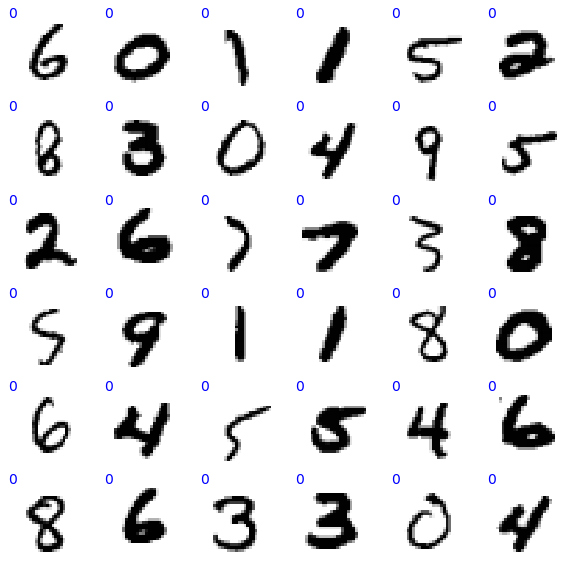

In [16]:
km.plot_input_data(X_train,Y_train,6,6,28,10)

In [17]:
help (km.reshape_input_data)

Help on function reshape_input_data in module kerasmnist:

reshape_input_data(X_train, X_validate, X_test, Y_train, Y_validate, Y_test, size=28)
    function reshape_input_data(X_train,X_validate,X_test,Y_train,Y_validate,Y_test,size=28)
    Reshaping datasets into CNN  shape 
    reshaping and normalization



In [18]:
# reshaping input data
X_train,X_validate,X_test,Y_train,Y_validate,Y_test=km.reshape_input_data(X_train,X_validate,X_test,Y_train,Y_validate,Y_test,28)


In [19]:
help(km.show_input_data)

Help on function show_input_data in module kerasmnist:

show_input_data(X_train, Y_train, X_validate, Y_validate, X_test, Y_test)
    Function show_input_data  shows
    train (X_train,Y_train)
    validate (X_validate,Y_validate)
    test (X_test,Y_test)
    datasets shape



In [20]:
km.show_input_data(X_train,Y_train,X_validate,Y_validate,X_test,Y_test)

X_train.shape:  (54000, 28, 28, 1)
Y_train.shape:  (54000, 10)
X_validate.shape:  (6000, 28, 28, 1)
Y_validate.shape:  (6000, 10)
X_test.shape:  (10000, 28, 28, 1)
Y_test.shape:  (10000, 10)


## 1 Model  with one convolution layer
Build and compile a basic model.

In [21]:
help(km.first_model)

Help on function first_model in module kerasmnist:

first_model(width=28, height=28, num_classes=10, verbose=0)
    function first_model(width=28,height=28,num_classes=10,verbose=0)



In [22]:
model_1=km.first_model(width=28,height=28,num_classes=10,verbose=0)

Instructions for updating:
Colocations handled automatically by placer.


In [23]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [24]:
help(km.display_model)

Help on function display_model in module kerasmnist:

display_model(model, image_name='model.png')
    function display_model(model,image_name='model.png')
    Displaying model as png file



In [25]:
km.display_model(model_1,'model_1.png')

In [26]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
checkpointer = ModelCheckpoint('mnist_weights.{epoch:02d}-{val_loss:.2f}.h5', verbose=1, save_best_only=True)

In [27]:
help(km.compile_model)

Help on function compile_model in module kerasmnist:

compile_model(model)
    function compile_model(model)
    Compiling model



In [28]:
km.compile_model(model_1)

In [29]:
help(km.fit_model)

Help on function fit_model in module kerasmnist:

fit_model(model, X_train, Y_train, X_validate, Y_validate, batch_size=32, epochs=10, verbose=1, callbacks=[])
    function fit_model(model,X_train, Y_train,
    X_validate, Y_validate,batch_size=32,    epochs=10,verbose=1,callbacks=[])
    Training model on X_train data with Y_train labels 
    with validation data X_validate, Y_validate
    callbacks can be used



In [30]:
%%time
%matplotlib inline
EPOCHS=15
#callbacks=[learning_rate_reduction,checkpointer,TQDMNotebookCallback()]
callbacks=[TQDMNotebookCallback(),checkpointer]
model_1_history=km.fit_model(model_1,X_train, Y_train,X_validate, Y_validate,batch_size=32, 
                             epochs=EPOCHS,verbose=1,callbacks=callbacks)

Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples


Epoch 1/15


54000/54000 [==============================] - 100s 2ms/step - loss: 0.2122 - acc: 0.9396 - mean_absolute_error: 0.0226 - val_loss: 0.0905 - val_acc: 0.9740 - val_mean_absolute_error: 0.0099

Epoch 00001: val_loss improved from inf to 0.09053, saving model to mnist_weights.01-0.09.h5
Epoch 2/15


54000/54000 [==============================] - 74s 1ms/step - loss: 0.0764 - acc: 0.9782 - mean_absolute_error: 0.0083 - val_loss: 0.0715 - val_acc: 0.9797 - val_mean_absolute_error: 0.0075

Epoch 00002: val_loss improved from 0.09053 to 0.07154, saving model to mnist_weights.02-0.07.h5
Epoch 3/15


54000/54000 [==============================] - 73s 1ms/step - loss: 0.0581 - acc: 0.9826 - mean_absolute_error: 0.0064 - val_loss: 0.0691 - val_acc: 0.9803 - val_mean_absolute_error: 0.0065

Epoch 00003: val_loss improved from 0.07154 to 0.06912, saving model to mnist_weights.03-0.07.h5
Epoch 4/15


54000/54000 [==============================] - 73s 1ms/step - loss: 0.0484 - acc: 0.9857 - mean_absolute_error: 0.0053 - val_loss: 0.0614 - val_acc: 0.9817 - val_mean_absolute_error: 0.0055

Epoch 00004: val_loss improved from 0.06912 to 0.06137, saving model to mnist_weights.04-0.06.h5
Epoch 5/15


54000/54000 [==============================] - 74s 1ms/step - loss: 0.0411 - acc: 0.9879 - mean_absolute_error: 0.0045 - val_loss: 0.0608 - val_acc: 0.9837 - val_mean_absolute_error: 0.0052

Epoch 00005: val_loss improved from 0.06137 to 0.06085, saving model to mnist_weights.05-0.06.h5
Epoch 6/15


54000/54000 [==============================] - 73s 1ms/step - loss: 0.0358 - acc: 0.9891 - mean_absolute_error: 0.0040 - val_loss: 0.0594 - val_acc: 0.9820 - val_mean_absolute_error: 0.0049

Epoch 00006: val_loss improved from 0.06085 to 0.05944, saving model to mnist_weights.06-0.06.h5
Epoch 7/15


54000/54000 [==============================] - 73s 1ms/step - loss: 0.0304 - acc: 0.9908 - mean_absolute_error: 0.0035 - val_loss: 0.0724 - val_acc: 0.9792 - val_mean_absolute_error: 0.0054

Epoch 00007: val_loss did not improve from 0.05944
Epoch 8/15


54000/54000 [==============================] - 71s 1ms/step - loss: 0.0266 - acc: 0.9919 - mean_absolute_error: 0.0030 - val_loss: 0.0664 - val_acc: 0.9813 - val_mean_absolute_error: 0.0048

Epoch 00008: val_loss did not improve from 0.05944
Epoch 9/15


54000/54000 [==============================] - 73s 1ms/step - loss: 0.0225 - acc: 0.9934 - mean_absolute_error: 0.0026 - val_loss: 0.0654 - val_acc: 0.9817 - val_mean_absolute_error: 0.0046

Epoch 00009: val_loss did not improve from 0.05944
Epoch 10/15


54000/54000 [==============================] - 73s 1ms/step - loss: 0.0186 - acc: 0.9946 - mean_absolute_error: 0.0023 - val_loss: 0.0646 - val_acc: 0.9850 - val_mean_absolute_error: 0.0040

Epoch 00010: val_loss did not improve from 0.05944
Epoch 11/15


54000/54000 [==============================] - 72s 1ms/step - loss: 0.0159 - acc: 0.9954 - mean_absolute_error: 0.0020 - val_loss: 0.0670 - val_acc: 0.9837 - val_mean_absolute_error: 0.0043

Epoch 00011: val_loss did not improve from 0.05944
Epoch 12/15


54000/54000 [==============================] - 73s 1ms/step - loss: 0.0143 - acc: 0.9956 - mean_absolute_error: 0.0018 - val_loss: 0.0727 - val_acc: 0.9820 - val_mean_absolute_error: 0.0042

Epoch 00012: val_loss did not improve from 0.05944
Epoch 13/15


54000/54000 [==============================] - 73s 1ms/step - loss: 0.0121 - acc: 0.9962 - mean_absolute_error: 0.0016 - val_loss: 0.0689 - val_acc: 0.9840 - val_mean_absolute_error: 0.0040

Epoch 00013: val_loss did not improve from 0.05944
Epoch 14/15


54000/54000 [==============================] - 72s 1ms/step - loss: 0.0097 - acc: 0.9974 - mean_absolute_error: 0.0013 - val_loss: 0.0770 - val_acc: 0.9818 - val_mean_absolute_error: 0.0042

Epoch 00014: val_loss did not improve from 0.05944
Epoch 15/15


54000/54000 [==============================] - 74s 1ms/step - loss: 0.0086 - acc: 0.9974 - mean_absolute_error: 0.0012 - val_loss: 0.0758 - val_acc: 0.9840 - val_mean_absolute_error: 0.0040

Epoch 00015: val_loss did not improve from 0.05944

CPU times: user 12min 10s, sys: 2min 52s, total: 15min 2s
Wall time: 18min 44s


In [31]:
help(km.model_evaluate)

Help on function model_evaluate in module kerasmnist:

model_evaluate(model, X, Y, verbose=1)
    function model_evaluate(model,X,Y,verbose=1)



In [32]:
scores_1=km.model_evaluate(model_1,X_test, Y_test,verbose=1)

10000/10000 [==============================] - 6s 622us/step
[0.06672574201599346, 0.9835, 0.003858834822805693]
loss: 0.06672574%
acc: 0.98350000%
['loss', 'acc', 'mean_absolute_error']


In [33]:
help(km.plot_model_history)

Help on function plot_model_history in module kerasmnist:

plot_model_history(model_history, size=5)
    function plot_model_history(model_history,size=5)



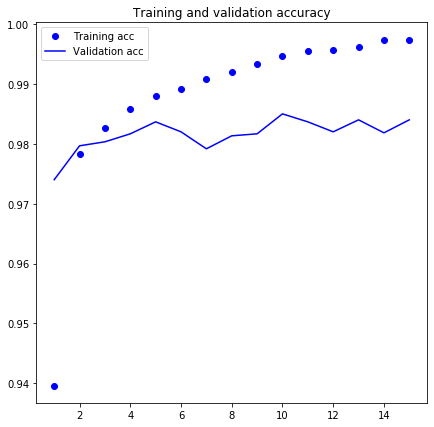

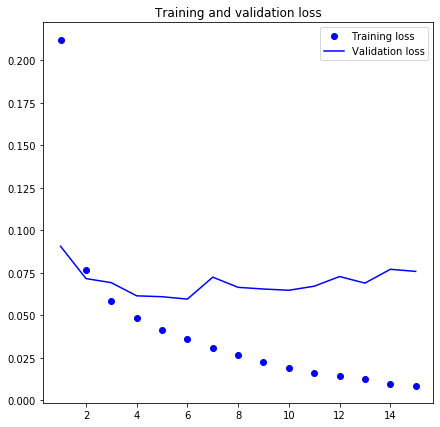

In [34]:
km.plot_model_history(model_1_history,7)

In [35]:
help(km.model_prediction_summary)

Help on function model_prediction_summary in module kerasmnist:

model_prediction_summary(model, X, Y, verbose=1)
    *



In [36]:
Y_hat=km.model_prediction_summary(model_1,X_test,Y_test,1)

10000/10000 [==============================] - 6s 577us/step
Input shape:  (10000, 28, 28, 1)
Label shape:  (10000, 10)
Predicted Label shape:  (10000,)
col_0    0     1     2    3    4    5    6     7    8    9
row_0                                                     
0      970     0     3    0    0    1    7     1    9    3
1        0  1127     2    0    0    0    2     2    0    0
2        3     4  1008    2    0    1    1     8    3    0
3        0     0     1  998    0    9    0     3    1    3
4        0     1     4    0  969    0    2     1    0    3
5        0     0     0    5    0  875    3     0    2    2
6        3     0     3    0    3    4  942     0    3    0
7        1     1     5    2    1    0    0  1006    2    6
8        2     2     6    2    0    0    1     2  951    3
9        1     0     0    1    9    2    0     5    3  989


In [37]:
pd.crosstab(Y_hat, np.argmax(Y_test, axis=-1))

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,970,0,3,0,0,1,7,1,9,3
1,0,1127,2,0,0,0,2,2,0,0
2,3,4,1008,2,0,1,1,8,3,0
3,0,0,1,998,0,9,0,3,1,3
4,0,1,4,0,969,0,2,1,0,3
5,0,0,0,5,0,875,3,0,2,2
6,3,0,3,0,3,4,942,0,3,0
7,1,1,5,2,1,0,0,1006,2,6
8,2,2,6,2,0,0,1,2,951,3


In [38]:
# Look at confusion matrix 
import itertools 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    from sklearn.metrics import confusion_matrix
    plt.figure(figsize=(8,8))
    _=plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [39]:
#from sklearn.metrics import confusion_matrix
#import seaborn as sns
#import itertools 
# Predict the values from the validation dataset
#Y_pred = model_1.predict(X_test)
# Convert predictions classes to one hot vectors 
#Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
#Y_true = np.argmax(Y_test,axis = 1) 
# compute the confusion matrix
#confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
#km.plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [40]:
help(km.plot_wrong_images)

Help on function plot_wrong_images in module kerasmnist:

plot_wrong_images(X, Y, Y_pred, size=10)



All items count:  10000
Wrong items count:  165
Accuracy:  0.9835


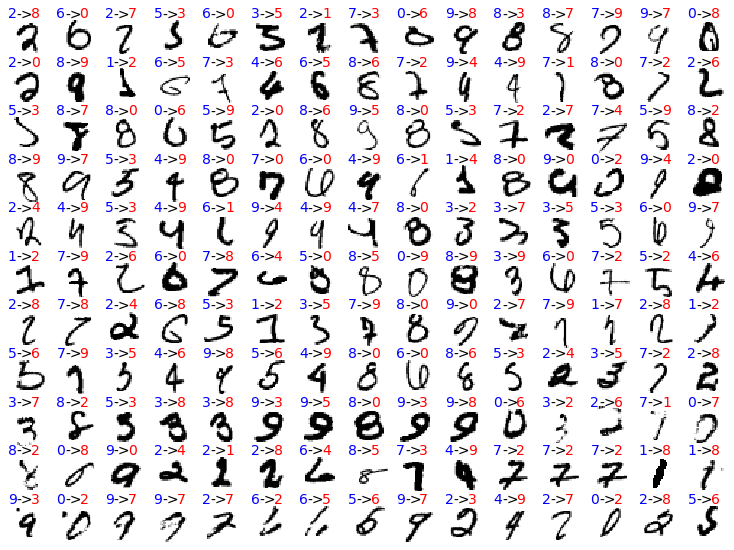

In [41]:
km.plot_wrong_images(X_test,Y_test,Y_hat,size=10)

In [50]:
help(km.model_save)

Help on function model_save in module kerasmnist:

model_save(model, schema_file='model.json', weights_file='model.h5')



In [43]:
km.model_save(model_1,schema_file='model_1.json',weights_file='model_1.h5')

Saved model to disk
Model json to:  model_1.json  weights to:  model_1.h5


In [44]:
# let's break
1/0

ZeroDivisionError: division by zero

## 2 Model with  added Dropout

In [45]:
model_2=km.second_model(width=28,height=28,num_classes=10,verbose=1)

(None, 26, 26, 32)
(None, 24, 24, 32)
(None, 12, 12, 32)
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
(None, 12, 12, 32)
(None, 4608)
(None, 10)


In [46]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                46090     
Total params: 55,658
Trainable params: 55,658
Non-trainable params: 0
__________________________________________________

In [47]:
km.display_model(model_2,'model_2.png')

In [48]:
km.compile_model(model_2)

Fit the model over 20 epochs. The predictiveness is impressive for such a small model!

In [49]:
%%time
EPOCHS=15
callbacks=[]
model_2_history=km.fit_model(model_2,X_train, Y_train,X_validate, Y_validate,batch_size=32, epochs=EPOCHS,verbose=1,callbacks=callbacks)

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 [==============================] - 77s 1ms/step - loss: 0.1691 - acc: 0.9501 - mean_absolute_error: 0.0167 - val_loss: 0.0691 - val_acc: 0.9810 - val_mean_absolute_error: 0.0064
Epoch 2/15
54000/54000 [==============================] - 74s 1ms/step - loss: 0.0645 - acc: 0.9797 - mean_absolute_error: 0.0063 - val_loss: 0.0508 - val_acc: 0.9848 - val_mean_absolute_error: 0.0045
Epoch 3/15
54000/54000 [==============================] - 74s 1ms/step - loss: 0.0470 - acc: 0.9853 - mean_absolute_error: 0.0047 - val_loss: 0.0540 - val_acc: 0.9853 - val_mean_absolute_error: 0.0044
Epoch 4/15
54000/54000 [==============================] - 75s 1ms/step - loss: 0.0393 - acc: 0.9876 - mean_absolute_error: 0.0039 - val_loss: 0.0493 - val_acc: 0.9862 - val_mean_absolute_error: 0.0039
Epoch 5/15
54000/54000 [==============================] - 75s 1ms/step - loss: 0.0318 - acc: 0.9895 - mean_absolute_error: 0.0032 - val_loss: 0.048

In [51]:
scores_2=km.model_evaluate(model_2,X_test, Y_test,verbose=1)

10000/10000 [==============================] - 7s 689us/step
[0.044061217211431, 0.9878, 0.002710641134263415]
loss: 0.04406122%
acc: 0.98780000%
['loss', 'acc', 'mean_absolute_error']


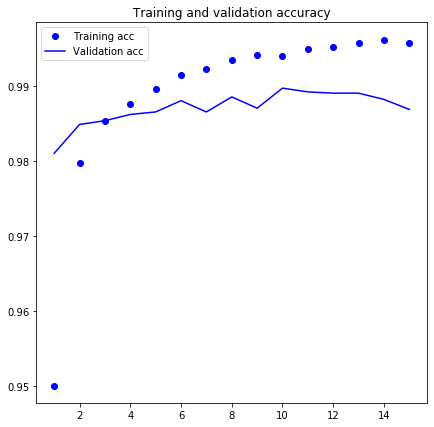

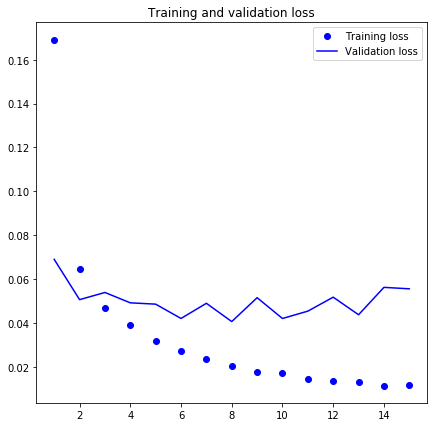

In [52]:
km.plot_model_history(model_2_history,7)

In [53]:
Y_hat=km.model_prediction_summary(model_2,X_test,Y_test,1)

10000/10000 [==============================] - 6s 625us/step
Input shape:  (10000, 28, 28, 1)
Label shape:  (10000, 10)
Predicted Label shape:  (10000,)
col_0    0     1     2     3    4    5    6     7    8    9
row_0                                                      
0      978     0     3     1    0    1    7     0    5    1
1        0  1131     1     0    0    0    1     2    1    0
2        0     1  1022     0    3    1    0     7    1    1
3        1     1     1  1005    0    5    1     3    2    4
4        0     0     0     0  955    0    1     0    0    2
5        0     0     0     2    0  883    2     1    0    6
6        0     1     0     0    4    1  944     0    1    0
7        0     0     5     1    2    0    0  1013    2    3
8        1     1     0     1    6    1    2     1  959    4
9        0     0     0     0   12    0    0     1    3  988


All items count:  10000
Wrong items count:  122
Accuracy:  0.9878


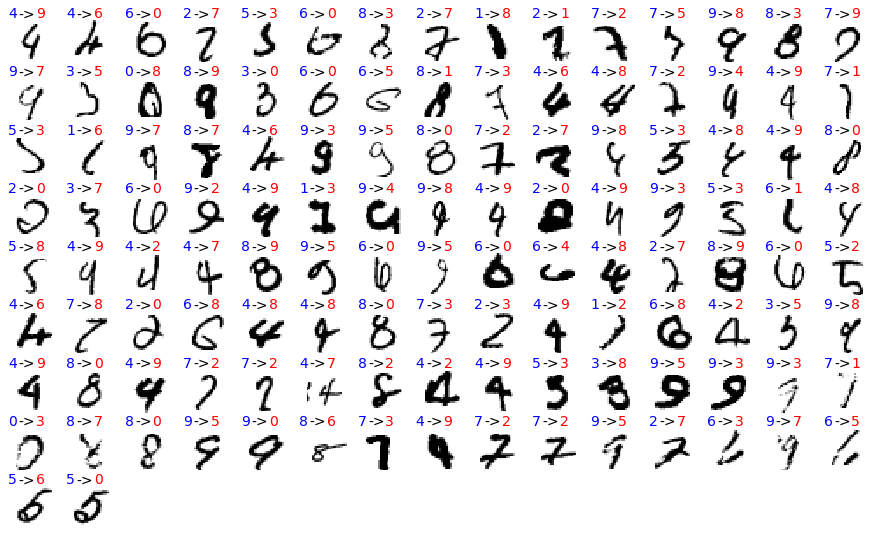

In [54]:
km.plot_wrong_images(X_test,Y_test,Y_hat,size=12)

In [55]:
Y_hat = model_2.predict_classes(X_test,verbose=1)

10000/10000 [==============================] - 6s 607us/step


In [ ]:
print("X_test.shape: " ,Y_test.shape)
print("Y_hat.shape: " ,Y_hat.shape)

In [56]:
pd.crosstab(Y_hat, np.argmax(Y_test, axis=-1))

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,978,0,3,1,0,1,7,0,5,1
1,0,1131,1,0,0,0,1,2,1,0
2,0,1,1022,0,3,1,0,7,1,1
3,1,1,1,1005,0,5,1,3,2,4
4,0,0,0,0,955,0,1,0,0,2
5,0,0,0,2,0,883,2,1,0,6
6,0,1,0,0,4,1,944,0,1,0
7,0,0,5,1,2,0,0,1013,2,3
8,1,1,0,1,6,1,2,1,959,4


In [57]:
km.model_save(model_2,'model_2.json','model_2.h5')

Saved model to disk
Model json to:  model_2.json  weights to:  model_2.h5


## 3 Model with more convolution layers and dropout

In [ ]:
#based on https://medium.com/@mjbhobe/mnist-digits-classification-with-keras-ed6c2374bd0e

In [58]:
model_3=km.third_model()

In [59]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)              

In [60]:
km.display_model(model_3,'model_3.png')

In [61]:
km.compile_model(model_3)

In [62]:
%%time
EPOCHS=15
callbacks=[]
model_3_history=km.fit_model(model_3,X_train, Y_train,X_validate, Y_validate,batch_size=32, epochs=EPOCHS,verbose=1,callbacks=callbacks)

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 [==============================] - 89s 2ms/step - loss: 0.1883 - acc: 0.9397 - mean_absolute_error: 0.0181 - val_loss: 0.0482 - val_acc: 0.9868 - val_mean_absolute_error: 0.0042
Epoch 2/15
54000/54000 [==============================] - 85s 2ms/step - loss: 0.0653 - acc: 0.9791 - mean_absolute_error: 0.0064 - val_loss: 0.0432 - val_acc: 0.9872 - val_mean_absolute_error: 0.0043
Epoch 3/15
54000/54000 [==============================] - 84s 2ms/step - loss: 0.0494 - acc: 0.9845 - mean_absolute_error: 0.0047 - val_loss: 0.0412 - val_acc: 0.9893 - val_mean_absolute_error: 0.0031
Epoch 4/15
54000/54000 [==============================] - 86s 2ms/step - loss: 0.0405 - acc: 0.9870 - mean_absolute_error: 0.0038 - val_loss: 0.0356 - val_acc: 0.9912 - val_mean_absolute_error: 0.0024
Epoch 5/15
54000/54000 [==============================] - 85s 2ms/step - loss: 0.0348 - acc: 0.9887 - mean_absolute_error: 0.0033 - val_loss: 0.037

In [63]:
scores_3=km.model_evaluate(model_3,X_test, Y_test,verbose=1)

10000/10000 [==============================] - 7s 688us/step
[0.022532340547882224, 0.9948, 0.0012245446863899557]
loss: 0.02253234%
acc: 0.99480000%
['loss', 'acc', 'mean_absolute_error']


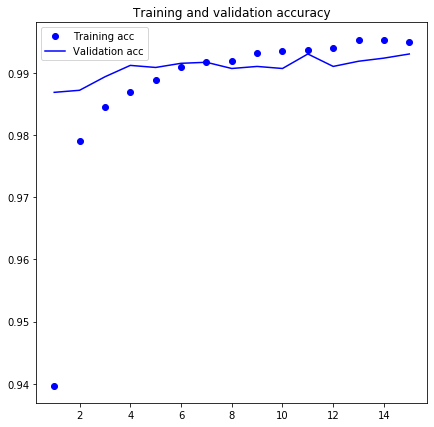

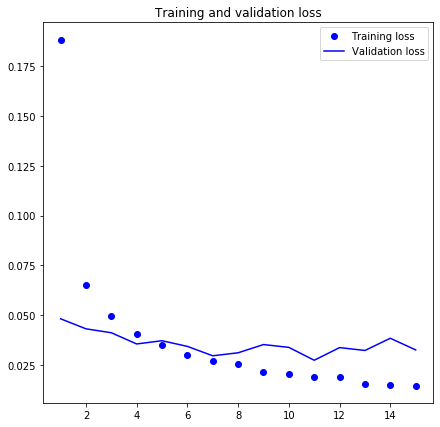

In [64]:
km.plot_model_history(model_3_history,7)

In [65]:
Y_hat=km.model_prediction_summary(model_3,X_test,Y_test,1)

10000/10000 [==============================] - 7s 674us/step
Input shape:  (10000, 28, 28, 1)
Label shape:  (10000, 10)
Predicted Label shape:  (10000,)
col_0    0     1     2     3    4    5    6     7    8    9
row_0                                                      
0      977     0     0     0    0    0    2     0    0    0
1        0  1133     1     0    0    0    2     2    0    0
2        0     0  1026     0    0    0    0     3    1    0
3        0     1     1  1009    0    3    0     0    1    0
4        0     0     0     0  979    0    3     0    0    5
5        0     0     0     1    0  888    1     0    1    1
6        2     0     0     0    0    1  948     0    0    0
7        1     1     4     0    0    0    0  1021    0    3
8        0     0     0     0    0    0    2     1  968    1
9        0     0     0     0    3    0    0     1    3  999


All items count:  10000
Wrong items count:  52
Accuracy:  0.9948


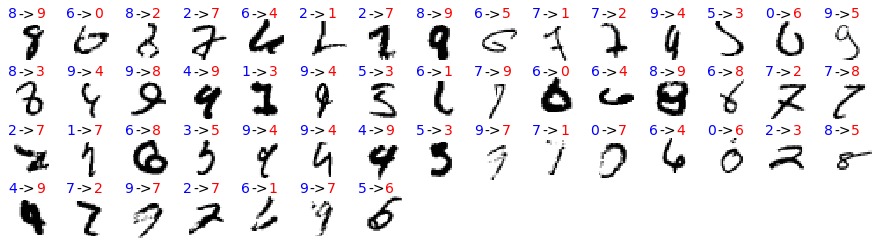

In [66]:
km.plot_wrong_images(X_test,Y_test,Y_hat,size=12)

In [67]:
pd.crosstab(Y_hat, np.argmax(Y_test, axis=-1))

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,977,0,0,0,0,0,2,0,0,0
1,0,1133,1,0,0,0,2,2,0,0
2,0,0,1026,0,0,0,0,3,1,0
3,0,1,1,1009,0,3,0,0,1,0
4,0,0,0,0,979,0,3,0,0,5
5,0,0,0,1,0,888,1,0,1,1
6,2,0,0,0,0,1,948,0,0,0
7,1,1,4,0,0,0,0,1021,0,3
8,0,0,0,0,0,0,2,1,968,1


In [68]:
#from sklearn.metrics import confusion_matrix
#import seaborn as sns
import itertools 
# Predict the values from the validation dataset
#Y_pred = model_3.predict(X_test)
# Convert predictions classes to one hot vectors 
#Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
#Y_true = np.argmax(Y_test,axis = 1) 
# compute the confusion matrix
#confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
#plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [69]:
km.model_save(model_3,'model_3.json','model_3.h5')

Saved model to disk
Model json to:  model_3.json  weights to:  model_3.h5


## 4 Model with more convolution layers, dropout and batch normalization

In [70]:
model_4=km.fourth_model(width=28,height=28,num_classes=10,verbose=0)

In [71]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 32)        25632     
_________________________________________________________________
batch_normalization_3 (Batch (None, 12, 12, 32)        128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 32)       

In [72]:
km.display_model(model_4,'model_4.png')

In [74]:
km.compile_model(model_4)

In [79]:
%%time
EPOCHS=15
callbacks=[]
model_4_history=km.fit_model(model_4,X_train, Y_train,X_validate, Y_validate,batch_size=32, epochs=EPOCHS,verbose=1,callbacks=callbacks)

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 [==============================] - 150s 3ms/step - loss: 0.1838 - acc: 0.9449 - mean_absolute_error: 0.0166 - val_loss: 0.0493 - val_acc: 0.9862 - val_mean_absolute_error: 0.0043
Epoch 2/15
54000/54000 [==============================] - 143s 3ms/step - loss: 0.0695 - acc: 0.9790 - mean_absolute_error: 0.0066 - val_loss: 0.0410 - val_acc: 0.9873 - val_mean_absolute_error: 0.0034
Epoch 3/15
54000/54000 [==============================] - 142s 3ms/step - loss: 0.0609 - acc: 0.9813 - mean_absolute_error: 0.0056 - val_loss: 0.0320 - val_acc: 0.9897 - val_mean_absolute_error: 0.0028
Epoch 4/15
54000/54000 [==============================] - 142s 3ms/step - loss: 0.0477 - acc: 0.9851 - mean_absolute_error: 0.0045 - val_loss: 0.0413 - val_acc: 0.9885 - val_mean_absolute_error: 0.0032
Epoch 5/15
54000/54000 [==============================] - 143s 3ms/step - loss: 0.0453 - acc: 0.9863 - mean_absolute_error: 0.0041 - val_loss: 

In [80]:
scores_4=km.model_evaluate(model_4,X_test, Y_test,verbose=1)

10000/10000 [==============================] - 8s 798us/step
[0.019189756344958005, 0.9943, 0.0014098087864267655]
loss: 0.01918976%
acc: 0.99430000%
['loss', 'acc', 'mean_absolute_error']


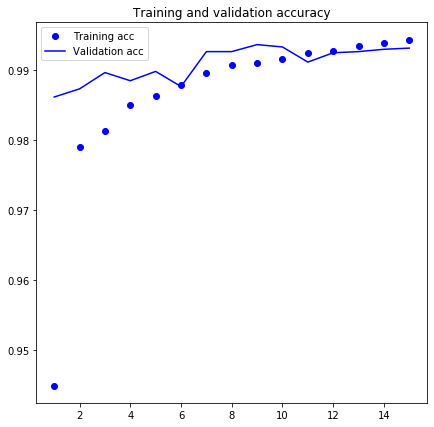

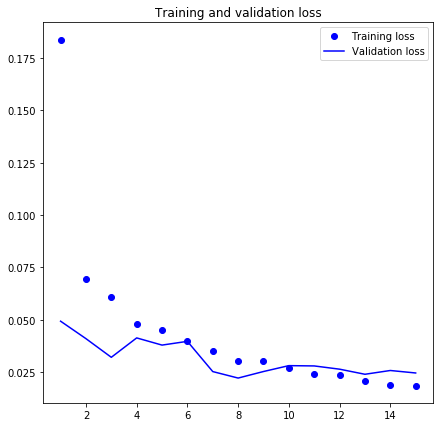

In [81]:
km.plot_model_history(model_4_history,7)

In [82]:
Y_hat=km.model_prediction_summary(model_4,X_test,Y_test,1)

10000/10000 [==============================] - 8s 765us/step
Input shape:  (10000, 28, 28, 1)
Label shape:  (10000, 10)
Predicted Label shape:  (10000,)
col_0    0     1     2     3    4    5    6     7    8    9
row_0                                                      
0      977     0     0     0    0    0    3     0    1    0
1        1  1132     0     0    0    0    3     2    0    0
2        0     0  1032     2    1    0    0     4    0    0
3        0     2     0  1007    0   10    0     0    3    0
4        0     0     0     0  977    0    1     0    0    4
5        0     0     0     1    0  881    2     0    0    1
6        1     0     0     0    0    1  949     0    0    0
7        1     1     0     0    0    0    0  1021    0    3
8        0     0     0     0    0    0    0     0  968    2
9        0     0     0     0    4    0    0     1    2  999


In [84]:
pd.crosstab(Y_hat, np.argmax(Y_test, axis=-1))

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,977,0,0,0,0,0,3,0,1,0
1,1,1132,0,0,0,0,3,2,0,0
2,0,0,1032,2,1,0,0,4,0,0
3,0,2,0,1007,0,10,0,0,3,0
4,0,0,0,0,977,0,1,0,0,4
5,0,0,0,1,0,881,2,0,0,1
6,1,0,0,0,0,1,949,0,0,0
7,1,1,0,0,0,0,0,1021,0,3
8,0,0,0,0,0,0,0,0,968,2


All items count:  10000
Wrong items count:  57
Accuracy:  0.9943


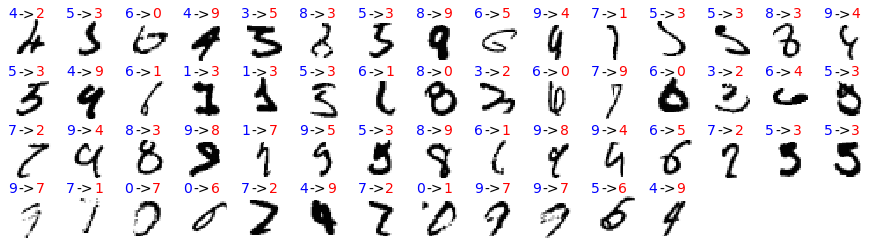

In [85]:
km.plot_wrong_images(X_test,Y_test,Y_hat,size=12)

In [86]:
km.model_save(model_4,'model_4.json','model_4.h5')

Saved model to disk
Model json to:  model_4.json  weights to:  model_4.h5


In [ ]:
# let us break 
1/0

## 4.5 Saving model schema and model weights on Google Drive (optional)

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

In [ ]:
save_url= '/gdrive/My Drive/Colab Notebooks/mnist/'

!ls -la '/gdrive/My Drive/Colab Notebooks/mnist/'

In [ ]:
!ls -la model*.*

In [ ]:
import os
os.system("cp model*.* '/gdrive/My Drive/Colab Notebooks/mnist/' ")

In [ ]:
!ls -la '/gdrive/My Drive/Colab Notebooks/mnist/' 

In [ ]:
# break
1/0

 ## 5. Transfer learning model

## 5 Using data augumentation

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [ ]:
datagen.fit(X_train)

In [ ]:
epochs=5
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)


In [ ]:
# copyying model_4 to model_5 

model_5=copy.copy(model_4)
model_5.set_weights(model_4.get_weights())

In [ ]:
model_5.summary()

In [ ]:
km.compile_model(model_5)

In [ ]:
epochs=1
model_5_history = model_5.fit_generator(datagen.flow(X_train,Y_train, batch_size=32),
                              epochs = epochs, validation_data = (X_validate, Y_validate),
                              verbose = 1, steps_per_epoch=X_train.shape[0] # batch_size
                              , callbacks=[learning_rate_reduction])

In [ ]:
scores_5=km.model_evaluate(model_5,X_test, Y_test,verbose=1)

In [ ]:
km.plot_model_history(model_5_history,7)

In [ ]:
Y_hat=km.model_prediction_summary(model_5,X_test,Y_test,1)

In [ ]:
pd.crosstab(Y_hat, np.argmax(Y_test, axis=-1))

In [ ]:
km.plot_wrong_images(X_test,Y_test,Y_hat,size=12)

In [ ]:
#from sklearn.metrics import confusion_matrix
#import seaborn as sns
#import itertools 
# Predict the values from the validation dataset
#Y_pred = model_5.predict(X_test)
# Convert predictions classes to one hot vectors 
#Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
#Y_true = np.argmax(Y_test,axis = 1) 
# compute the confusion matrix
#confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
#plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [ ]:
model_save(model_5,'model_5.json','model_5.h5')

In [ ]:
# end of script

In [ ]:
# force runtime error 
1/0

### II. Double convolution

Putting two layers of convolution immediately after one another tends to produce very predictive models. Here, we also follow the convolution layers by a dense hidden layer. Note that training this model takes **significantly** longer than the dense models to run. As such, I ran only the first 1000 samples. Using all of them should yield a classification rate near 99.5% on the entire test set.

In [ ]:
### first old model 
#model = Sequential()

#model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape = (1, 28, 28)))
#model.add(Activation("relu"))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

#model.add(Flatten())
#model.add(Dense(10))
#model.add(Activation('softmax'))    

#### second old model 

#model = Sequential()

#model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape = (1, 28, 28)))
#model.add(Activation("relu"))
#model.add(Convolution2D(32, 3, 3, border_mode='same'))
#model.add(Activation("relu"))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

#model.add(Flatten())
#model.add(Dense(128))
#model.add(Activation("relu"))
#model.add(Dropout(0.5))
#model.add(Dense(10))
#model.add(Activation('softmax'))


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',
          input_shape=(28, 28,1)))
print(model.output_shape)

model.add(Conv2D(32, (3, 3), activation='relu'))
print(model.output_shape)

model.add(MaxPooling2D(pool_size=(2, 2)))
print(model.output_shape)

from keras.layers import Dropout
model.add(Dropout(0.25))
print(model.output_shape)

from keras.layers import Flatten
model.add(Flatten())
print(model.output_shape)

model.add(Dense(128, activation='relu'))
print(model.output_shape)

model.add(Dropout(0.5))
print(model.output_shape)
model.add(Dense(10, activation='softmax'))
print(model.output_shape)

In [ ]:
rms = RMSprop()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=rms)

In [ ]:
model.summary()

In [ ]:
model_history=model.fit(X_train, Y_train, batch_size=32, epochs=10,
          verbose=1, validation_split=0.2)

In [ ]:
#print("Test classification rate %0.05f" % model.evaluate(X_test, Y_test, show_accuracy=True)[1])
model.evaluate(X_test, Y_test)
y_hat = model.predict_classes(X_test)
pd.crosstab(y_hat, y_test)

In [ ]:
test_wrong = [im for im in zip(X_test,y_hat,y_test) if im[1] != im[2]]
print("Wrong items count: ",len(test_wrong))
plt.figure(figsize=(10, 10))
for ind, val in enumerate(test_wrong[:100]):
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.subplot(10, 10, ind + 1)
    im = 1 - val[0].reshape((28,28))
    plt.axis("off")
    plt.text(0, 0, val[2], fontsize=14, color='blue')
    plt.text(8, 0, val[1], fontsize=14, color='red')
    plt.imshow(im, cmap='gray')

In [ ]:
scores = model.evaluate(X_test, Y_test, verbose=1)
#model.evaluate(X_test, Y_test)
#print("%s: %.4f%%" % (model.metrics_names[0], scores[0]))
#print("%s: %.4f%%" % (model.metrics_names[1], scores[1]))


model.metrics_names[0]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

In [ ]:
from keras.models import model_from_json

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

### III. Visualizing convolution weights
Now, we want to visualize the convolution layers here.

In [ ]:
print(model_1.layers) # list of the layers
print(model_1.layers[0].get_weights()[0].shape) # the weights

The first set of weights will be given as weights the same size as the input space.

In [ ]:
W1 = model_1.layers[0].get_weights()[0]

plt.figure(figsize=(10, 10), frameon=False)
for ind, val in enumerate(W1):
    plt.subplot(6, 6, ind + 1)
    im = val.reshape((3,3))
    plt.axis("off")
    plt.imshow(im, cmap='gray',interpolation='nearest')

The second layer of weights will be given as a set of 32 weights with dimensions of 3x3x32.

In [ ]:
W2 = model.layers[2].get_weights()[0]

plt.figure(figsize=(10, 10), frameon=False)
for ind, val in enumerate(W2):
    plt.subplot(6, 6, ind + 1)
    im = val.reshape((32,9))
    plt.axis("off")
    plt.imshow(im, cmap='gray',interpolation='nearest')

### IV. Activations of the neural network

Look at activations of several examples after the first layer:

In [ ]:
model2 = copy.copy(model)
model2.layers = model2.layers[:2]
model2.compile(loss='categorical_crossentropy', optimizer=rms) # don't forget this step!

these = random.choice(range(1000),3,replace=False)
x_rep = model2.predict(X_test[these])

for this_x_rep in x_rep:
    plt.figure(figsize=(10, 10), frameon=False)
    for ind, val in enumerate(this_x_rep):
        plt.subplot(6, 6, ind + 1)
        plt.axis("off")
        plt.imshow(val, cmap='gray',interpolation='nearest')

Activations after the second layer:

In [ ]:
model2 = copy.copy(model)
model2.layers = model2.layers[:4]
model2.compile(loss='categorical_crossentropy', optimizer=rms) # don't forget this step!

x_rep = model2.predict(X_test[these])

for this_x_rep in x_rep:
    plt.figure(figsize=(10, 10), frameon=False)
    for ind, val in enumerate(this_x_rep):
        plt.subplot(6, 6, ind + 1)
        plt.axis("off")
        plt.imshow(val, cmap='gray',interpolation='nearest')

Finally, activations after max pooling:

In [ ]:
model2 = copy.copy(model)
model2.layers = model2.layers[:5]
model2.compile(loss='categorical_crossentropy', optimizer=rms) # don't forget this step!

x_rep = model2.predict(X_test[these])

for this_x_rep in x_rep:
    plt.figure(figsize=(10, 10), frameon=False)
    for ind, val in enumerate(this_x_rep):
        plt.subplot(6, 6, ind + 1)
        plt.axis("off")
        plt.imshow(val, cmap='gray',interpolation='nearest')

### V. Further tweaks: alternative optimizers and early stopping
Just to show off a few more tweaks, we'll run a simple MLP model. Here we use weights and an alternative to vanillia stochastic gradient descent. 

In [ ]:
model = Sequential()

model.add(Flatten(input_shape = (28, 28,1)))
model.add(Dense(128, init="glorot_normal"))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
rms = RMSprop()
model.compile(loss='categorical_crossentropy', optimizer=rms)

model.fit(X_train, Y_train, batch_size=32, epochs=25,
          verbose=1, validation_split=0.2,
         callbacks=[EarlyStopping(monitor='val_loss', patience=0)])

In [ ]:
model.evaluate(X_test, Y_test)
y_hat = model.predict_classes(X_test)
pd.crosstab(y_hat, y_test)

In [ ]:
test_wrong = [im for im in zip(X_test,y_hat,y_test) if im[1] != im[2]]
print(len(test_wrong))
plt.figure(figsize=(10, 10))
for ind, val in enumerate(test_wrong[:100]):
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.subplot(10, 10, ind + 1)
    im = 1 - val[0].reshape((28,28))
    plt.axis("off")
    plt.text(0, 0, val[2], fontsize=14, color='blue')
    plt.text(8, 0, val[1], fontsize=14, color='red')
    plt.imshow(im, cmap='gray')